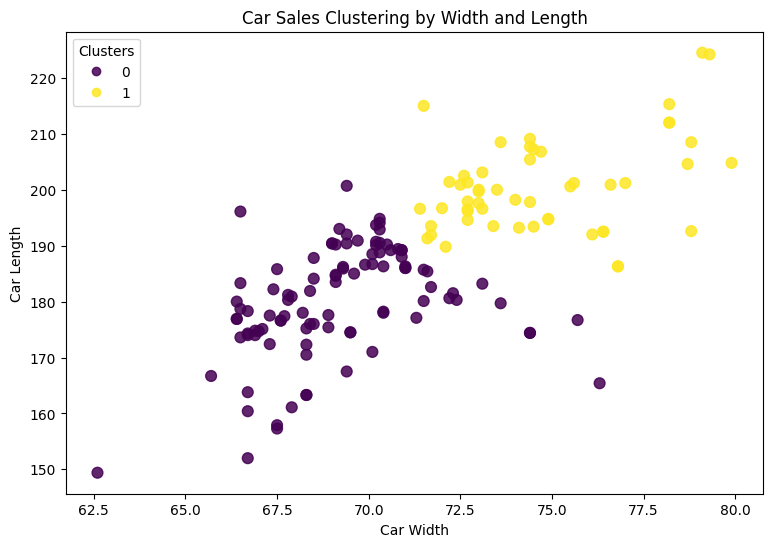

In [1]:
# =========================================================
# Car Sales Clustering by Width and Length
# =========================================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# ---------------------------------------------------------
# Load dataset
# ---------------------------------------------------------
df = pd.read_csv("ML470_S7_Vehicle_Data_Practice.csv")

# Remove missing values
df = df.dropna()

# ---------------------------------------------------------
# Select features
# ---------------------------------------------------------
X = df[['Width', 'Length']]

# ---------------------------------------------------------
# Scale features
# ---------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------------
# Agglomerative Clustering (2 clusters, Ward)
# ---------------------------------------------------------
agg = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward',
    metric='euclidean'
)

df['Cluster'] = agg.fit_predict(X_scaled)

# ---------------------------------------------------------
# Scatter Plot
# ---------------------------------------------------------
plt.figure(figsize=(9, 6))

scatter = plt.scatter(
    df['Width'],
    df['Length'],
    c=df['Cluster'],
    cmap='viridis',
    s=60,
    alpha=0.85
)

plt.title("Car Sales Clustering by Width and Length")
plt.xlabel("Car Width")
plt.ylabel("Car Length")

# Legend
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=["0", "1"],
    title="Clusters",
    loc="upper left"
)

plt.show()
